<a href="https://colab.research.google.com/github/meerab-17/Heart-disease-prediction/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement: The aim is to develope a predictive model using heart disease dataset to classify whether a person is likely to have a heart disease based on clinical features such as age,chest pain type,cholestrol and more. Data cleaning,exploration, model training, evaluation, and comparison between Logistic Regression and Decision Tree classifiers will be done.


In [9]:
!pip install seaborn scikit-learn pandas matplotlib --quiet

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [14]:
#loading dataset
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [15]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [17]:
#data inspection
print("\n Shape of the dataset:", df.shape)
print("\n Columns:", df.columns.tolist())

print("\n Dataset Info:")
df.info()

print("\n Summary Statistics:")
df.describe()

print("\n Missing values:")
print(df.isnull().sum())


 Shape of the dataset: (1025, 14)

 Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

 Summary Statistics:

 Missing

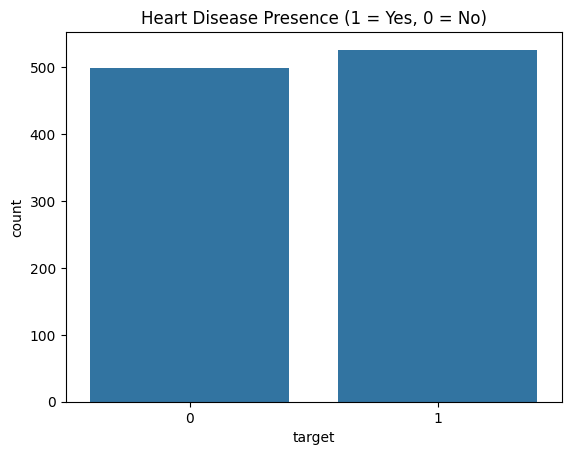

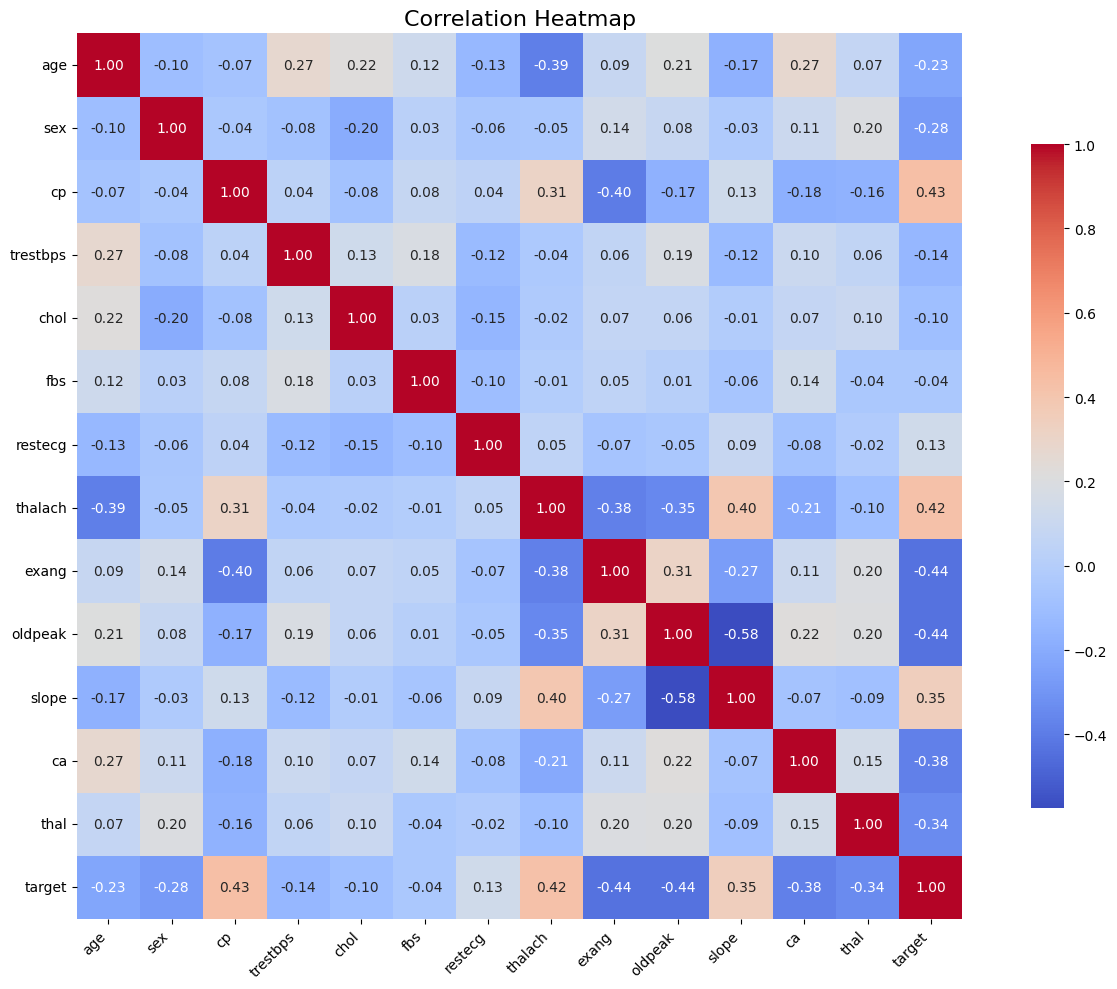

In [31]:
#analysis
sns.countplot(data=df, x='target')
plt.title('Heart Disease Presence (1 = Yes, 0 = No)')
plt.show()

plt.figure(figsize=(14,10))  # Increase figure size to prevent label overlap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": 0.75})
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [32]:
X = df.drop('target', axis=1)
y = df['target']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
#Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)

In [36]:
#Decision Tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

In [37]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n {name} Accuracy:", accuracy_score(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


 Logistic Regression Accuracy: 0.7951219512195122


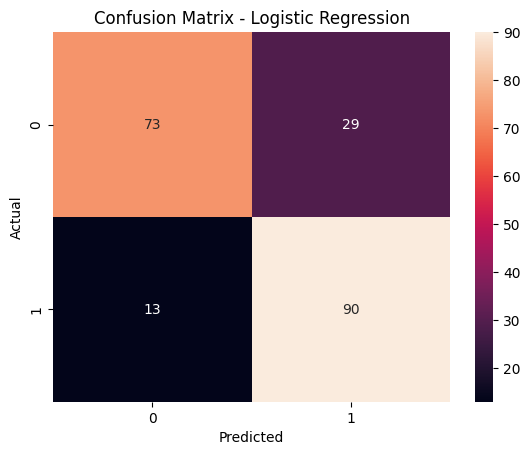


 Decision Tree Accuracy: 0.8


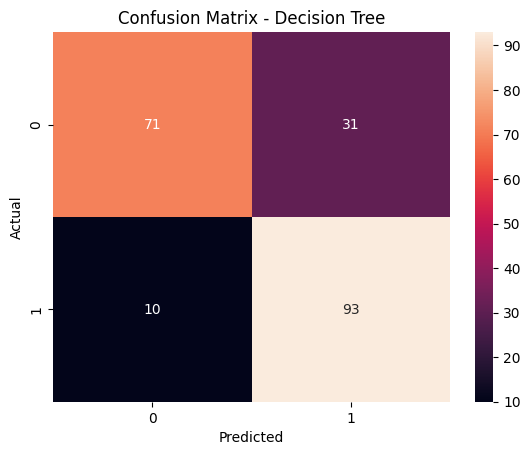

In [38]:
# Evaluate both models
evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("Decision Tree", y_test, tree_preds)

In [39]:
# ROC Curve (Logistic Regression)
log_probs = log_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, log_probs)
roc_auc = roc_auc_score(y_test, log_probs)

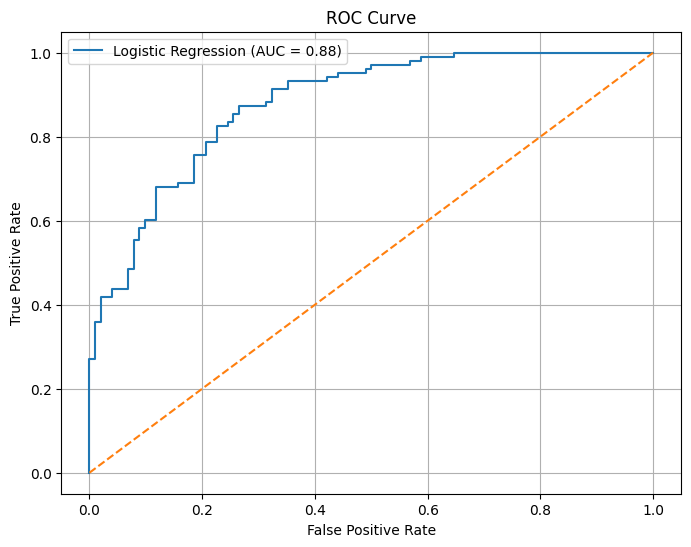

In [40]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Conclusion:
#- Logistic Regression achieved strong performance with clear decision boundaries.
#- Decision Tree provides an interpretable alternative and is good for understanding rules.
#- Features like cp (chest pain type), thalach (max heart rate), and oldpeak were most correlated with heart disease presence.
#- ROC AUC for logistic regression shows good separation ability.